<a href="https://colab.research.google.com/github/LQMinh528/AI/blob/main/W7_Machine_Learning_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#breast-cancer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import numpy as np

url = 'breast-cancer.csv'
data = pd.read_csv(url)
data.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


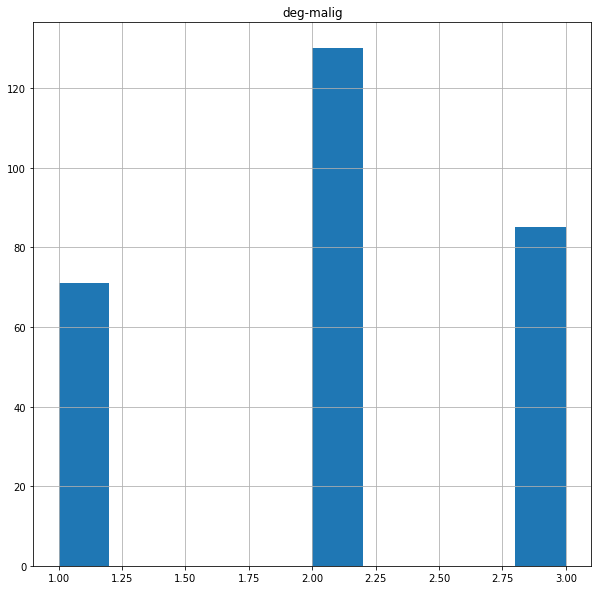

In [3]:
data.hist(figsize = (10,10))
plt.show()

In [4]:
correlation=data.corr()
print(correlation)

           deg-malig
deg-malig        1.0


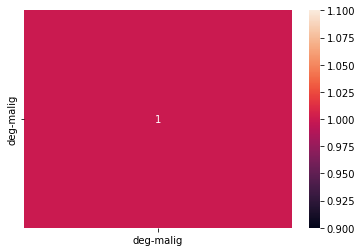

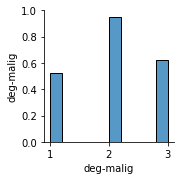

In [11]:
sns.heatmap(correlation, annot=True)
sns.pairplot(data)

In [12]:
model = linear_model.LinearRegression()
X = pd.DataFrame([data['deg-malig'], data['deg-malig']**2]).T
model.fit(X, y = data['deg-malig'])
print('Intercept của mô hình là: ', model.intercept_)
print('Coefficent của mô hình là: ', model.coef_)
print('Độ chính xác của mô hình là: ', model.score(X,y = data['deg-malig']))

Intercept của mô hình là:  -1.3322676295501878e-15
Coefficent của mô hình là:  [1.00000000e+00 4.24296574e-17]
Độ chính xác của mô hình là:  1.0


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


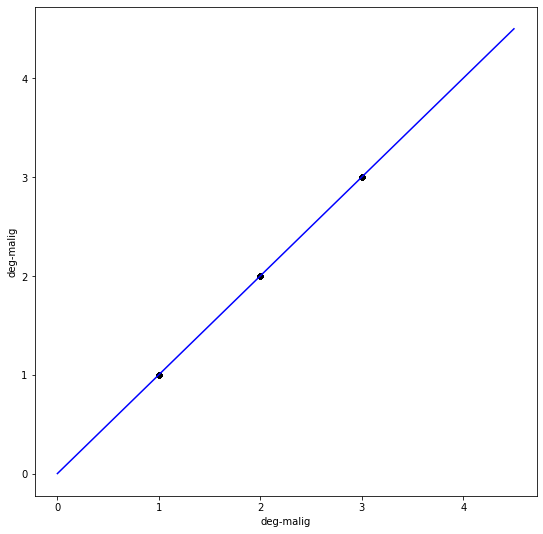

In [13]:
range = np.arange(0,5,0.5)
X_range = pd.DataFrame([range, range**2]).T
y_predict = model.predict(X=X_range)
data.plot(kind = 'scatter', x = 'deg-malig', y = 'deg-malig', figsize = (9,9), color ='black')
plt.plot(range, y_predict, color = 'blue')